In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from keras.utils.np_utils import to_categorical
#from keras.models import Sequential
#from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
#import keras.backend as K
import glob
from PIL import Image
from sklearn.model_selection import train_test_split 
#from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from sklearn.metrics import confusion_matrix
#from keras.callbacks import EarlyStopping
from keras.preprocessing import image
import cv2
import os
import re
from PIL import Image
Image.MAX_IMAGE_PIXELS = 10000000000 
from skimage import io
import labelme
from Img_pro_defs import *


Using TensorFlow backend.


In [3]:
def write_nicely1 (data,path):
    for i in range (len(data)):
        img = data[i]
        cv2.imwrite(path[i], img)
       

In [8]:
files1 = glob.glob('Data/canola/orig/*.png')
files2 = glob.glob('Data/canola/anot/*.png')
orig = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in files1])
data = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in files2])

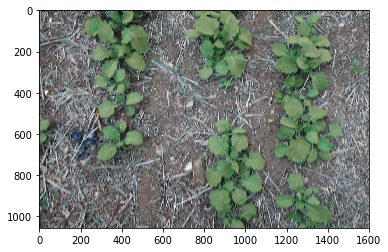

In [31]:
plt.imshow(orig[3]/255)

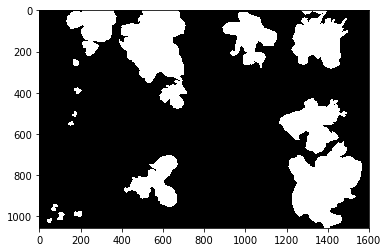

In [54]:
plt.imshow(data[25])

In [7]:
files = glob.glob('Data/json/starco_white_half/allweeds/*.JPG')
files = sorted_nicely(files)
files

['Data/json/starco_white_half/allweeds/PICT_20190531_102323.JPG',
 'Data/json/starco_white_half/allweeds/PICT_20190531_102327.JPG',
 'Data/json/starco_white_half/allweeds/PICT_20190531_102332.JPG',
 'Data/json/starco_white_half/allweeds/PICT_20190531_102337.JPG',
 'Data/json/starco_white_half/allweeds/PICT_20190531_102343.JPG',
 'Data/json/starco_white_half/allweeds/PICT_20190531_102355.JPG',
 'Data/json/starco_white_half/allweeds/PICT_20190531_102405.JPG',
 'Data/json/starco_white_half/allweeds/PICT_20190531_102432.JPG',
 'Data/json/starco_white_half/allweeds/PICT_20190531_102531.JPG',
 'Data/json/starco_white_half/allweeds/PICT_20190531_102707.JPG',
 'Data/json/starco_white_half/allweeds/PICT_20190531_102712.JPG']

In [25]:
data = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in files])

In [26]:
data = data.sum(axis = 3)
data.shape

(11, 1056, 1600)

In [27]:
data[data!=0] = 1

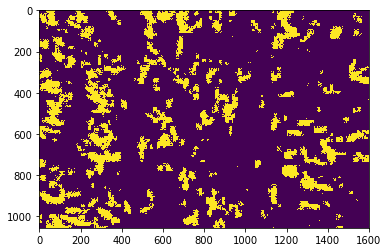

In [14]:
plt.imshow(data[0])

In [30]:
files = [w.replace('json','SF') for w in files]
files = [w.replace('.JPG', '.png') for w in files]
files

['Data/SF/starco_white_half/allweeds/PICT_20190531_102323.png',
 'Data/SF/starco_white_half/allweeds/PICT_20190531_102327.png',
 'Data/SF/starco_white_half/allweeds/PICT_20190531_102332.png',
 'Data/SF/starco_white_half/allweeds/PICT_20190531_102337.png',
 'Data/SF/starco_white_half/allweeds/PICT_20190531_102343.png',
 'Data/SF/starco_white_half/allweeds/PICT_20190531_102355.png',
 'Data/SF/starco_white_half/allweeds/PICT_20190531_102405.png',
 'Data/SF/starco_white_half/allweeds/PICT_20190531_102432.png',
 'Data/SF/starco_white_half/allweeds/PICT_20190531_102531.png',
 'Data/SF/starco_white_half/allweeds/PICT_20190531_102707.png',
 'Data/SF/starco_white_half/allweeds/PICT_20190531_102712.png']

In [31]:
write_nicely1 (data,files)

In [10]:
#groups = [files[k:k+225] for k in range(0, len(files), 225)]

In [4]:
len(files)

23

In [12]:
#create_collage(files,'fred_1.png',13)

In [5]:
paths = [w.replace('Originals', 'SF') for w in files]
paths = [w.replace('.JPG', '.png') for w in paths]
paths

['Data/SF/fine tune/PICT_20190610_094306.png',
 'Data/SF/fine tune/PICT_20190610_094327.png',
 'Data/SF/fine tune/PICT_20190610_094446.png',
 'Data/SF/fine tune/PICT_20190610_094540.png',
 'Data/SF/fine tune/PICT_20190610_095631.png',
 'Data/SF/fine tune/PICT_20190610_100043.png',
 'Data/SF/fine tune/PICT_20190610_100050.png',
 'Data/SF/fine tune/PICT_20190610_101130.png',
 'Data/SF/fine tune/PICT_20190610_101200.png',
 'Data/SF/fine tune/PICT_20190610_101615.png',
 'Data/SF/fine tune/PICT_20190610_102431.png',
 'Data/SF/fine tune/PICT_20190610_103024.png',
 'Data/SF/fine tune/PICT_20190610_103510.png',
 'Data/SF/fine tune/PICT_20190610_103524.png',
 'Data/SF/fine tune/PICT_20190610_103550.png',
 'Data/SF/fine tune/PICT_20190610_104051.png',
 'Data/SF/fine tune/PICT_20190610_104311.png',
 'Data/SF/fine tune/PICT_20190610_104615.png',
 'Data/SF/fine tune/PICT_20190610_115922.png',
 'Data/SF/fine tune/PICT_20190610_120030.png',
 'Data/SF/fine tune/PICT_20190610_120057.png',
 'Data/SF/fin

In [5]:
original  = []
filter_ = []


In [2]:
original = image.img_to_array(image.load_img('Data/collage/fine_tune1.png'))
filter_ = image.img_to_array(image.load_img('Data/collage/fine_tune1_ml.png'))
hold = background_remove(filter_,original)

In [3]:
filter_ = thresholding (hold, 20)
filter_ = median_filter (filter_,5)
filter_[filter_!=0] = 1
filter_ = filter_.reshape(filter_.shape[0],filter_.shape[1],1)
cv2.imwrite('Data/collage/fine_tune1_bkrm.png', filter_ * original)

True

In [ ]:
original = image.img_to_array(image.load_img('Data/collage/fine_tune1.png'))

In [6]:
image_split(paths,'Data/Masks/fine_tune1_bkrm2/label.png',5)

(5400, 8080, 3)
Data/SF/fine tune/PICT_20190610_094306.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_094327.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_094446.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_094540.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_095631.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_100043.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_100050.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_101130.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_101200.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_101615.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_102431.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_103024.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_103510.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_103524.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_103550.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_104051.png
(1080, 1616, 3)
Data/SF/fine tune/PICT_20190610_104311.p

In [6]:
image = cv2.imread(files[0])
#image[image!=0] = 1

In [12]:
cv2.imwrite('Data/SF/fine tune /PICT_20190610_120030.png', image)

True

In [72]:
! labelme_json_to_dataset Data/json/starco_white_half/weed_labelled/PICT_20190531_102722.json -o Data/Masks/starco_white_half/PICT_20190531_102722

[WARNING] This script is aimed to demonstrate how to convert theJSON file to a single image dataset, and not to handlemultiple JSON files to generate a real-use dataset. (json_to_dataset.py:15)
[WARNING] info.yaml is being replaced by label_names.txt (json_to_dataset.py:68)
[INFO] Saved to: Data/Masks/starco_white_half/PICT_20190531_102722 (json_to_dataset.py:73)


In [15]:
path = 'Data/Masks/starco_white_half'
path1 = 'Data/Back_rm/Fred_204_205/30-05-2019'
path2 = 'Data/temp/fredericks_204_205/30_05_2019'
listdir = os.listdir(path)
listdir.sort()

In [16]:
listdir

['PICT_20190531_102135',
 'PICT_20190531_102213',
 'PICT_20190531_102318',
 'PICT_20190531_102550',
 'PICT_20190531_102556',
 'PICT_20190531_102606',
 'PICT_20190531_102611',
 'PICT_20190531_102658',
 'PICT_20190531_102722']

In [17]:
paths = []
for i in range(len(listdir)):
    paths.append(path + '/' + listdir[i] + '/label.png')

In [18]:
paths

['Data/Masks/starco_white_half/PICT_20190531_102135/label.png',
 'Data/Masks/starco_white_half/PICT_20190531_102213/label.png',
 'Data/Masks/starco_white_half/PICT_20190531_102318/label.png',
 'Data/Masks/starco_white_half/PICT_20190531_102550/label.png',
 'Data/Masks/starco_white_half/PICT_20190531_102556/label.png',
 'Data/Masks/starco_white_half/PICT_20190531_102606/label.png',
 'Data/Masks/starco_white_half/PICT_20190531_102611/label.png',
 'Data/Masks/starco_white_half/PICT_20190531_102658/label.png',
 'Data/Masks/starco_white_half/PICT_20190531_102722/label.png']

In [33]:
data = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in paths])

In [34]:
data = data.sum(axis = 3)
data[data!=0] = 1
#data[data == 0] = 0

In [40]:
len(data)*1056*1600

15206400

In [98]:
paths = [w.replace('Masks','SF') for w in paths]
paths = [w[:46]+'.png' for w in paths]
paths

['Data/SF/starco_white_half/PICT_20190531_102135.png',
 'Data/SF/starco_white_half/PICT_20190531_102213.png',
 'Data/SF/starco_white_half/PICT_20190531_102318.png',
 'Data/SF/starco_white_half/PICT_20190531_102550.png',
 'Data/SF/starco_white_half/PICT_20190531_102556.png',
 'Data/SF/starco_white_half/PICT_20190531_102606.png',
 'Data/SF/starco_white_half/PICT_20190531_102611.png',
 'Data/SF/starco_white_half/PICT_20190531_102658.png',
 'Data/SF/starco_white_half/PICT_20190531_102722.png']

In [99]:
write_nicely1 (data,paths)

In [127]:
paths = glob.glob('Data/SF/borstmayer2ndpass/*.png')
paths = sorted_nicely(paths)

In [129]:
paths = [w.replace('SF','Originals') for w in paths]
paths = [w.replace('.png','.JPG') for w in paths]

In [130]:
data = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in paths])

In [131]:
data.shape

(58, 1056, 1600, 3)

In [132]:
paths = [w.replace('Originals','canola') for w in paths]
paths = [w.replace('borstmayer2ndpass','orig') for w in paths]
paths = [w.replace('.JPG','.png')  for w in paths]
paths

['Data/canola/orig/PICT_20190627_123317.png',
 'Data/canola/orig/PICT_20190627_123338.png',
 'Data/canola/orig/PICT_20190627_123343.png',
 'Data/canola/orig/PICT_20190627_123417.png',
 'Data/canola/orig/PICT_20190627_123624.png',
 'Data/canola/orig/PICT_20190627_123810.png',
 'Data/canola/orig/PICT_20190627_123901.png',
 'Data/canola/orig/PICT_20190627_124155.png',
 'Data/canola/orig/PICT_20190627_124203.png',
 'Data/canola/orig/PICT_20190627_124210.png',
 'Data/canola/orig/PICT_20190627_124215.png',
 'Data/canola/orig/PICT_20190627_124245.png',
 'Data/canola/orig/PICT_20190627_124306.png',
 'Data/canola/orig/PICT_20190627_124311.png',
 'Data/canola/orig/PICT_20190627_124321.png',
 'Data/canola/orig/PICT_20190627_124325.png',
 'Data/canola/orig/PICT_20190627_124330.png',
 'Data/canola/orig/PICT_20190627_124338.png',
 'Data/canola/orig/PICT_20190627_124343.png',
 'Data/canola/orig/PICT_20190627_124536.png',
 'Data/canola/orig/PICT_20190627_124557.png',
 'Data/canola/orig/PICT_20190627_1

In [133]:
write_nicely1 (data,paths)